# Import librairies

In [16]:
import pygame, random, json
import numpy as np
import matplotlib.pyplot as plt

# Math formule

In [17]:
# input : Sun mass, time step, position x, position y, velocity x, velocity y
def next_iteration(M, dt, x, y, vx, vy):
    G = 6.674184e-11
    k = - G * M / (x ** 2. + y ** 2.) ** (3./2.) 

    vx = k * x * dt + vx
    vy = k * y * dt + vy

    # return updated positions and velocities
    # output : position x, position y, vitesse x, vitesse y
    return [x + dt * vx, y + dt * vy, vx, vy]

# Simulation

In [18]:
class Planet:
    def __init__(self,index=0, name ="PerfectPlanet",x=249,y=140,vx=4,vy=4,radius=5):
        self.index = index
        self.name = f"P-{name}"
        self.x = x 
        self.y = y
        self.vx = vx
        self.vy = vy
        self.radius = radius

        self.distance = 0.0
        self.angle = 0.0
        
        self.R = random.randint(10,245)
        self.B = random.randint(10,245)
        self.G = random.randint(10,245)

        self.revolution = False
        self.revolutionCounter = 0
        self.destroy = False

        self.x0 = x 
        self.y0 = y
        self.vx0 = vx
        self.vy0 = vy

    def draw(self, display):
        pygame.draw.circle(display, (self.R, self.G, self.B), (self.x,self.y), self.radius)

    def calculRevolution(self, v1, v2):
        newAngle = v1.angle_to(v2)
        current = self.angle
        self.angle += newAngle - current
        if(np.sign(current) != np.sign(newAngle)):
            self.revolutionCounter = self.revolutionCounter + 1
            if self.revolutionCounter == 3:
                self.revolution = True
                print(f"{self.name} en orbite autour du soleil !")

    def checkCollisionWithSun(self, v1, v2):
        self.distance = v1.distance_to(v2)
        if self.distance < 10 + 5:
            self.radius = 0
            self.destroy = True

    def get(self):
        data = {
            'name' : f'{self.name}',
            'revolution' : self.revolution,
            'x at t0' : self.x0,
            'y at t0' : self.y0,
            'vx at t0' : self.vx0,
            'vy at t0' : self.vy0,
            'radius' : self.radius,
            'distance at t0' : self.distance,
            'angle at t0' : self.angle,
            'destroy' : self.destroy,
            'color' : [{
                'r' : self.R,
                'b' : self.B,
                'g' : self.G
            }]
        }
        return data


        
        
class Sun:
    def __init__(self,name,x,y,masse = 100000000000000 ,radius = 10):
        self.name = f"S-{name}"
        self.masse = masse
        self.radius = radius
        self.x = x
        self.y = y

    def draw(self, display):
        pygame.draw.circle(display, (255, 255, 0), (self.x,self.y), self.radius)

    def get(self):
        data = {'Sun':[{
            'name' : f'{self.name}',
            'masse' : self.masse,
            'radius' : self.radius,
            'x position' : self.x,
            'y position' : self.y
        }]}
        return data

    def saveToJson(self):
        with open('data_sun.json', 'w') as f:
            json.dump(self.get(), f)
    

In [19]:
def drawGrid(window_width, window_height, display, color = [250,250,250], show = False ):
    if(show):
        blockSize = 20 #Set the size of the grid block
        for x in range(0, window_width, blockSize):
            for y in range(0, window_height, blockSize):
                rect = pygame.Rect(x, y, blockSize, blockSize)
                pygame.draw.rect(display, color, rect, 1)

In [20]:
def saveToJson(data):        
    with open('data_planet.json', 'w') as f:
        json.dump(data, f)

def updateJson(index,dataToUpdate,value):
    with open("data_planet.json", "r") as jsonFile:
        data = json.load(jsonFile)
        data[f"_id{index}"][dataToUpdate] = value
    saveToJson(data)


In [21]:
size=[600,600]
clock = pygame.time.Clock()
screen=pygame.display.set_mode(size)
dt = 0.05
planets = []
planets_data = {}



#planets.append(Planet())
number_of_planets = 50
for i in range(number_of_planets):
    planets.append(Planet(i,f"{i}",random.randint(0,250),random.randint(0,250),random.randint(5,7),random.randint(5,7)))
    planets_data[f"_id{i}"] = planets[i].get()
saveToJson(planets_data)
sun = Sun(str(random.randint(0,250)),size[0]/2,size[0]/2)
sun.saveToJson()
# Animation dans la fenêtre PyGame
def animation(screen) :
    for planet in planets : 
        planet.draw(screen)
        planet.x, planet.y, planet.vx, planet.vy = next_iteration(sun.masse, dt, planet.x-sun.x,planet.y-sun.y,planet.vx,planet.vy)
        planet.x += sun.x
        planet.y += sun.y
        v1 = pygame.math.Vector2(sun.x, sun.y)
        v2 = pygame.math.Vector2(planet.x, planet.y)
        planet.calculRevolution(v1,v2)
        planet.checkCollisionWithSun(v1,v2)
        if(planet.revolution == True or planet.destroy == True):
            updateJson(planet.index, 'revolution',True)
            updateJson(planet.index, 'destroy',True)



        
    sun.draw(screen)

    
 
def mainloop():
    while True:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()

        animation(screen)
        pygame.display.flip()
        clock.tick(60)
        pygame.display.update()
        screen.fill((0, 0, 0))

                    


mainloop()

C:\Users\Florent\AppData\Local\Temp/ipykernel_29536/3062152421.py:78: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  pygame.draw.circle(display, (255, 255, 0), (self.x,self.y), self.radius)
C:\Users\Florent\AppData\Local\Temp/ipykernel_29536/3062152421.py:28: DeprecationWarning: an integer is required (got type float).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  pygame.draw.circle(display, (self.R, self.G, self.B), (self.x,self.y), self.radius)


P-9 en orbite autour du soleil !
P-31 en orbite autour du soleil !
P-23 en orbite autour du soleil !
P-32 en orbite autour du soleil !
P-33 en orbite autour du soleil !


KeyboardInterrupt: 

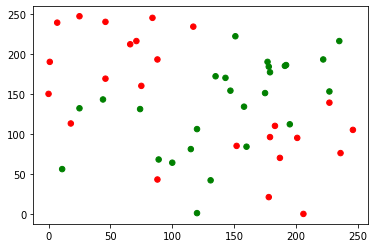

In [27]:
dataPlanet = json.load(open('data_planet.json'))
dataSun = json.load(open('data_sun.json'))
 
x = []
y = []
size = []
color = []
for i in range(len(dataPlanet)):

    x.append(dataPlanet[f"_id{i}"]['x at t0'])
    y.append(dataPlanet[f"_id{i}"]['y at t0'])
    size.append(dataPlanet[f"_id{i}"]['radius']*6)
    if(dataPlanet[f"_id{i}"]['revolution'] == True):
        color.append("#008000")
    else :
        color.append("#FF0000")
    
plt.scatter(x,y, s=size, c=color)
#plt.savefig('ScatterPlot_01.png')
plt.show()